In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from datetime import datetime
from datetime import date

In [49]:
df_model = pd.read_csv("../inter_data/EDA_data.csv")

In [50]:
df_model = df_model[[col for col in df_model.columns if "Unnamed" not in  col ]]

In [53]:
df_model

cm_cd   cm_mobile  refer_count  activation_count IncomePA cm_occup  \
0      76556800  6000015546            1               0.0    5_10L        P   
1      49282624  6000016229            1               0.0     <=1L        S   
2      60000270  6000027031            1               0.0     <=1L        P   
3      64606053  6000031654           31              23.0     <=1L        S   
4      86330038  6000037524            3               0.0     <=1L        S   
...         ...         ...          ...               ...      ...      ...   
33381  99998155  9999815503            1               0.0     <=1L        B   
33382  INDERSI5  9999888891            1               0.0     1_5L      NaN   
33383  59684125  9999893553            1               1.0     <=1L        P   
33384  SAMPATIW  9999903825            2               2.0    5_10L        P   
33385  99999205  9999920530            1               1.0     <=1L        S   

      E2Channel  IsKarvy KRA YN   age  months_since_last_login  \
0           CAT        0      N  22.0                 1.791433   
1           CAT        0      Y  22.0                 0.838641   
2           CAT        0      N  22.0                 1.134335   
3           CAT        0      N  32.0                 0.312963   
4           CAT        0      Y  23.0                 1.035770   
...         ...      ...    ...   ...                      ...   
33381       CAT        0      N  27.0               132.000000   
33382    Premia        0      N  36.0                 0.312963   
33383       CAT        0      N  25.0                 0.312963   
33384       CAT        0      N  33.0                 0.312963   
33385       CAT        0      N  37.0                 4.551243   

       months_since_last_trade  total_logins_one_year  total_trades_one_year  \
0                   132.000000                   10.0                    0.0   
1                     1.528594                   35.0                    1.0   
2                     1.068625                    4.0                    1.0   
3                     3.171338                  208.0                    5.0   
4                     2.645660                   69.0                    1.0   
...                        ...                    ...                    ...   
33381               132.000000                    0.0                    0.0   
33382                 0.542947                 1367.0                  292.0   
33383                 0.542947                 1635.0                   63.0   
33384                 1.331464                  381.0                   41.0   
33385               132.000000                   10.0                    0.0   

       referees_avg_logins_in_last_year  referees_avg_trades_in_last_year  \
0                                   NaN                               NaN   
1                                   NaN                               NaN   
2                                   NaN                               NaN   
3                              3.833333                          1.608696   
4                                   NaN                               NaN   
...                                 ...                               ...   
33381                               NaN                               NaN   
33382                               NaN                               NaN   
33383                        477.000000                         68.000000   
33384                         45.500000                          2.500000   
33385                         37.000000                          0.000000   

       num_referees_logging_in  num_referees_trading  
0                            0                     0  
1                            0                     0  
2                            0                     0  
3                           23                    21  
4                            0                     0  
...                        ...          

In [54]:
df_model.isna().sum()

cm_cd                                   0
cm_mobile                               0
refer_count                             0
activation_count                        0
IncomePA                              247
cm_occup                              354
E2Channel                              34
IsKarvy                                 0
KRA YN                                  0
age                                     0
months_since_last_login                 0
months_since_last_trade                 0
total_logins_one_year                   0
total_trades_one_year                   0
referees_avg_logins_in_last_year    22957
referees_avg_trades_in_last_year    20636
num_referees_logging_in                 0
num_referees_trading                    0
dtype: int64

In [56]:
df_anal = df_model.copy()

In [57]:
df_anal.describe()

cm_mobile   refer_count  activation_count       IsKarvy  \
count  3.338600e+04  33386.000000      33386.000000  33386.000000   
mean   8.601602e+09      2.829899          0.955670      0.010154   
std    1.082617e+09     56.858938         13.227621      0.100255   
min    6.000016e+09      1.000000          0.000000      0.000000   
25%    7.828021e+09      1.000000          0.000000      0.000000   
50%    8.850839e+09      1.000000          0.000000      0.000000   
75%    9.561453e+09      2.000000          1.000000      0.000000   
max    9.999921e+09  10237.000000       2274.000000      1.000000   

                age  months_since_last_login  months_since_last_trade  \
count  33386.000000             33386.000000             33386.000000   
mean      27.354250                23.242926                40.687815   
std        9.331117                47.991441                59.487637   
min        1.000000                 0.312963                 0.312963   
25%       21.000000                 0.345818                 0.970060   
50%       24.000000                 1.101480                 1.988562   
75%       31.000000                 5.734019               132.000000   
max      121.000000               132.000000               176.053738   

       total_logins_one_year  total_trades_one_year  \
count           33386.000000           33386.000000   
mean              320.668693              78.796142   
std              1099.293999             729.154607   
min                 0.000000               0.000000   
25%                 5.000000               0.000000   
50%                21.000000               1.000000   
75%                90.000000               3.000000   
max             53532.000000           89876.000000   

       referees_avg_logins_in_last_year  referees_avg_trades_in_last_year  \
count                      10429.000000                      12750.000000   
mean                         108.589779                         13.425911   
std                          509.690317                        148.074436   
min                            1.000000                          0.000000   
25%                            4.000000                          0.250000   
50%                           10.000000                          1.000000   
75%                           29.000000                          2.000000   
max                        17268.000000                       8461.000000   

       num_referees_logging_in  num_referees_trading  
count             33386.000000          33386.000000  
mean                  0.955790              0.667705  
std                  13.227633              7.110467  
min                   0.000000              0.000000  
25%                   0.000000              0.000000  
50%                   0.000000              0.000000  
75%                   1.000000              1.000000  
max                2274.000000           1115.000000

In [58]:
pd.DataFrame(df_anal.nunique()).rename(columns = {0: "num_unique"})

num_unique
cm_cd                                  33386
cm_mobile                              33261
refer_count                               94
activation_count                          69
IncomePA                                   9
cm_occup                                  23
E2Channel                                 12
IsKarvy                                    2
KRA YN                                     2
age                                       78
months_since_last_login                  663
months_since_last_trade                  486
total_logins_one_year                   2972
total_trades_one_year                   1318
referees_avg_logins_in_last_year        1489
referees_avg_trades_in_last_year         663
num_referees_logging_in                   69
num_referees_trading                      60

In [201]:

df_anal["activation_perc"] = df_anal["num_referees_trading"]/df_anal["refer_count"]


bins = [0, 18, 24, 30, 40, 50, 100]
df_anal['age_binned'] = pd.cut(df_anal['age'], bins)

e2channels = list(df_anal["E2Channel"].value_counts().index[:5])
df_anal['E2Channel'].loc[~df_anal['E2Channel'].isin(e2channels)] = 'others'


income_slabs = list(df_anal["IncomePA"].value_counts().index[:5])
df_anal["IncomePA"] =df_anal["IncomePA"].replace({"5_10L ??": "5_10L", 
                                    "<=1??": "<=1L", 
                                    "1_5??": "1_5L", "<= 1L": "<=1L"})
df_anal['IncomePA'].loc[~df_anal['IncomePA'].isin(income_slabs)] = 'others'

occups = list(df_anal["cm_occup"].value_counts().index[:5])
df_anal['cm_occup'].loc[~df_anal['cm_occup'].isin(occups)] = 'others'

bins = [0, 1, 2, 3, 4, 6, 10237]

df_anal["refer_bin"] = pd.cut(df_anal['refer_count'], bins)
bins = [-0.001, 0.2, 1, 2, 3, 4, 2274]
df_anal["activation_bin"] = pd.cut(df_anal['activation_count'], bins)

df_anal["activation_perc_bin"] = pd.qcut(df_anal['activation_perc'], 20, duplicates = "drop")

In [60]:
pd.DataFrame(df_anal.nunique()).rename(columns = {0: "num_unique"})

num_unique
cm_cd                                  33386
cm_mobile                              33261
refer_count                               94
activation_count                          69
IncomePA                                   6
cm_occup                                   6
E2Channel                                  6
IsKarvy                                    2
KRA YN                                     2
age                                       78
months_since_last_login                  663
months_since_last_trade                  486
total_logins_one_year                   2972
total_trades_one_year                   1318
referees_avg_logins_in_last_year        1489
referees_avg_trades_in_last_year         663
num_referees_logging_in                   69
num_referees_trading                      60
activation_perc                          261
age_binned                                 6
refer_bin                                  6
activation_bin                             5
activation_perc_bin                        6

In [103]:
df_anal

cm_cd   cm_mobile  refer_count  activation_count IncomePA cm_occup  \
0      76556800  6000015546            1               0.0    5_10L        P   
1      49282624  6000016229            1               0.0     <=1L        S   
2      60000270  6000027031            1               0.0     <=1L        P   
3      64606053  6000031654           31              23.0     <=1L        S   
4      86330038  6000037524            3               0.0     <=1L        S   
...         ...         ...          ...               ...      ...      ...   
33381  99998155  9999815503            1               0.0     <=1L        B   
33382  INDERSI5  9999888891            1               0.0     1_5L   others   
33383  59684125  9999893553            1               1.0     <=1L        P   
33384  SAMPATIW  9999903825            2               2.0    5_10L        P   
33385  99999205  9999920530            1               1.0     <=1L        S   

      E2Channel  IsKarvy KRA YN   age  months_since_last_login  \
0           CAT        0      N  22.0                 1.791433   
1           CAT        0      Y  22.0                 0.838641   
2           CAT        0      N  22.0                 1.134335   
3           CAT        0      N  32.0                 0.312963   
4           CAT        0      Y  23.0                 1.035770   
...         ...      ...    ...   ...                      ...   
33381       CAT        0      N  27.0               132.000000   
33382    Premia        0      N  36.0                 0.312963   
33383       CAT        0      N  25.0                 0.312963   
33384       CAT        0      N  33.0                 0.312963   
33385       CAT        0      N  37.0                 4.551243   

       months_since_last_trade  total_logins_one_year  total_trades_one_year  \
0                   132.000000                   10.0                    0.0   
1                     1.528594                   35.0                    1.0   
2                     1.068625                    4.0                    1.0   
3                     3.171338                  208.0                    5.0   
4                     2.645660                   69.0                    1.0   
...                        ...                    ...                    ...   
33381               132.000000                    0.0                    0.0   
33382                 0.542947                 1367.0                  292.0   
33383                 0.542947                 1635.0                   63.0   
33384                 1.331464                  381.0                   41.0   
33385               132.000000                   10.0                    0.0   

       referees_avg_logins_in_last_year  referees_avg_trades_in_last_year  \
0                                   NaN                               NaN   
1                                   NaN                               NaN   
2                                   NaN                               NaN   
3                              3.833333                          1.608696   
4                                   NaN                               NaN   
...                                 ...                               ...   
33381                               NaN                               NaN   
33382                               NaN                               NaN   
33383                        477.000000                         68.000000   
33384                         45.500000                          2.500000   
33385                         37.000000                          0.000000   

       num_referees_logging_in  num_referees_trading  activation_perc  \
0                            0                     0         0.000000   
1                            0                     0         0.000000   
2                            0                     0         0.000000   
3                           23                    21         0.741935   
4    

In [121]:
df_agewise.columns[:1]

Index(['refer_count', 'activation_count', 'num_referees_trading',
       'refer_count'],
      dtype='object')

#### Agewsie analaysis

In [122]:
df_agewise = pd.concat([df_anal.groupby(by = ["age_binned"]).mean()[["refer_count", "activation_count", "num_referees_trading"]], 
                       df_anal.groupby(by = ["age_binned"]).sum()[["refer_count"]]], axis = 1)
df_agewise.columns = list(df_agewise.columns)[:-1] + ["total_refers"]

In [123]:
df_agewise

refer_count  activation_count  num_referees_trading  total_refers
age_binned                                                                   
(0, 18]        2.258145          0.879699              0.714286          2703
(18, 24]       3.313712          1.141845              0.777225         53311
(24, 30]       2.692081          0.885915              0.624527         19208
(30, 40]       2.220362          0.706989              0.515617         12867
(40, 50]       2.026413          0.626043              0.452734          4373
(50, 100]      1.999002          0.708583              0.507984          2003

In [124]:
df_agewise["mean_perc_trade_activation"] = (df_agewise["num_referees_trading"]/df_agewise["refer_count"]*100).astype(str).str[:5] + "%"

In [125]:
df_agewise

refer_count  activation_count  num_referees_trading  total_refers  \
age_binned                                                                      
(0, 18]        2.258145          0.879699              0.714286          2703   
(18, 24]       3.313712          1.141845              0.777225         53311   
(24, 30]       2.692081          0.885915              0.624527         19208   
(30, 40]       2.220362          0.706989              0.515617         12867   
(40, 50]       2.026413          0.626043              0.452734          4373   
(50, 100]      1.999002          0.708583              0.507984          2003   

           mean_perc_trade_activation  
age_binned                             
(0, 18]                        31.63%  
(18, 24]                       23.45%  
(24, 30]                       23.19%  
(30, 40]                       23.22%  
(40, 50]                       22.34%  
(50, 100]                      25.41%

#### channelwise analsyis

In [127]:
df_curr = pd.concat([df_anal.groupby(by = ["E2Channel"]).mean()[["refer_count", "activation_count", "num_referees_trading"]], 
                       df_anal.groupby(by = ["E2Channel"]).sum()[["refer_count"]]], axis = 1)
df_curr.columns = list(df_curr.columns)[:-1] + ["total_refers"]
df_curr["mean_perc_trade_activation"] = (df_curr["num_referees_trading"]/df_curr["refer_count"]*100).astype(str).str[:5] + "%"
df_curr

refer_count  activation_count  num_referees_trading  \
E2Channel                                                             
Banca              1.293103          0.301724              0.206897   
CAT                2.871345          0.979401              0.680603   
Franchisee         2.066775          0.412866              0.292345   
GL Investments     1.535385          0.181538              0.113846   
Premia             1.539568          0.347722              0.282974   
others             5.655914          2.788530              2.297491   

                total_refers mean_perc_trade_activation  
E2Channel                                                
Banca                    150                      16.0%  
CAT                    89072                     23.70%  
Franchisee              2538                     14.14%  
GL Investments           499                     7.414%  
Premia                   642                     18.38%  
others                  1578                     40.62%

#### karvywise

In [128]:
df_curr = pd.concat([df_anal.groupby(by = ["IsKarvy"]).mean()[["refer_count", "activation_count", "num_referees_trading"]], 
                       df_anal.groupby(by = ["IsKarvy"]).sum()[["refer_count"]]], axis = 1)
df_curr.columns = list(df_curr.columns)[:-1] + ["total_refers"]
df_curr["mean_perc_trade_activation"] = (df_curr["num_referees_trading"]/df_curr["refer_count"]*100).astype(str).str[:5] + "%"
df_curr

refer_count  activation_count  num_referees_trading  total_refers  \
IsKarvy                                                                      
0           2.838230          0.960359              0.670772         93795   
1           2.017699          0.498525              0.368732           684   

        mean_perc_trade_activation  
IsKarvy                             
0                           23.63%  
1                           18.27%

In [107]:
df_anal["num_referees_trading"].sum()

22292

#### analsyis of the top referrers

In [129]:
df_anal2 = df_anal[df_anal["num_referees_trading"] >= 5]

<AxesSubplot:>

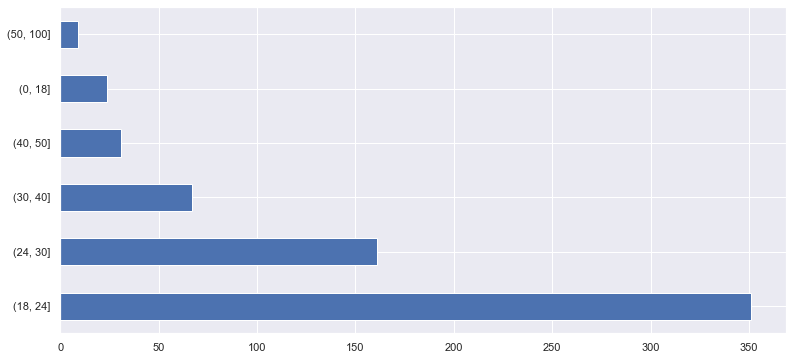

In [135]:
sns.set(rc={'figure.figsize':(13,6)})

df_anal2["age_binned"].value_counts().plot(kind = "barh")

In [150]:
df_anal2.dropna()

cm_cd   cm_mobile  refer_count  activation_count IncomePA cm_occup  \
3      64606053  6000031654           31              23.0     <=1L        S   
32     11029129  6000295315           11               7.0     <=1L        S   
215    72756583  6002211705            5               5.0    5_10L        S   
267    45850600  6002894990            7               5.0     <=1L        S   
394    62000402  6200040215           41              35.0     <=1L        S   
...         ...         ...          ...               ...      ...      ...   
32908  MAHEN874  9982594263           12               9.0    5_10L        P   
33022  40275231  9987790321           12               5.0     <=1L        S   
33025  64855281  9987907404           49              25.0    5_10L        S   
33266  79341184  9996444632            9               7.0     <=1L        S   
33344  99987795  9998779569            8               5.0    5_10L        P   

      E2Channel  IsKarvy KRA YN   age  months_since_last_login  \
3           CAT        0      N  32.0                 0.312963   
32          CAT        0      N  24.0                 0.312963   
215         CAT        0      N  23.0                 0.477237   
267         CAT        0      Y  28.0                 0.970060   
394         CAT        0      N  25.0                 0.510092   
...         ...      ...    ...   ...                      ...   
32908       CAT        0      Y  24.0               132.000000   
33022       CAT        0      Y  21.0                 0.575802   
33025       CAT        0      N  48.0                 0.772931   
33266       CAT        0      N  19.0                 0.345818   
33344       CAT        0      Y  50.0                 0.970060   

       months_since_last_trade  total_logins_one_year  total_trades_one_year  \
3                     3.171338                  208.0                    5.0   
32                    1.265754                   77.0                   13.0   
215                   1.430029                   31.0                    1.0   
267                   1.495739                   47.0                    1.0   
394                   1.068625                   79.0                    1.0   
...                        ...                    ...                    ...   
32908               132.000000                    0.0                    0.0   
33022                 2.185691                   77.0                    1.0   
33025                 1.791433                   59.0                    1.0   
33266                 0.772931                   86.0                    5.0   
33344                 1.922852                  335.0                   40.0   

       referees_avg_logins_in_last_year  referees_avg_trades_in_last_year  \
3                              3.833333                          1.608696   
32                            15.600000                         10.000000   
215                            2.750000                          1.000000   
267                            6.750000                          1.000000   
394                            2.709677                          4.212121   
...                                 ...                               ...   
32908                         63.750000                          0.777778   
33022                         13.750000                          2.200000   
33025                          4.200000                          1.040000   
33266                         22.333333                          2.857143   
33344                         42.800000                          5.200000   

       num_referees_logging_in  num_referees_trading  activation_perc  \
3                           23                    21         0.741935   
32                           7                     5         0.636364   
215                          5                     5         1.000000   
267                          5                     5         0.714286   
394  

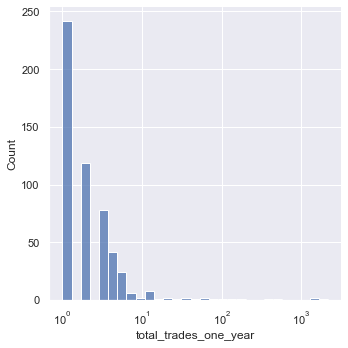

In [160]:
sns.set(rc={'figure.figsize':(20,6)})
sns.displot(x = "total_trades_one_year", data = df_anal2[df_anal2["total_trades_one_year"] > 0].dropna(), log_scale = True)

In [202]:
df_anal3 = df_anal[(df_anal["refer_count"] >= 10) & (df_anal["num_referees_trading"] == 0)]
df_anal3

cm_cd   cm_mobile  refer_count  activation_count IncomePA cm_occup  \
118    80810664  6001227067           10               2.0    5_10L        P   
204    43343301  6002084661           18               0.0     <=1L        S   
279    60892323  6003044998           16               0.0    5_10L        P   
858    65115446  6264342954           29               2.0    5_10L        P   
893    SUSHM880  6264833612           13               3.0     <=1L        P   
...         ...         ...          ...               ...      ...      ...   
32237  63513042  9953573304           24               0.0     <=1L        S   
32276  98017010  9954785660           14               1.0    5_10L        P   
32282  30800636  9954956088           11               0.0     <=1L        S   
32517  TD081982  9967156142           16               0.0    5_10L        P   
33200  52818715  9993549339           11               4.0    5_10L        P   

      E2Channel  IsKarvy KRA YN   age  months_since_last_login  \
118         CAT        0      Y  22.0                 3.302757   
204         CAT        0      Y  24.0                 4.551243   
279         CAT        0      Y  24.0                 6.883940   
858         CAT        0      N  22.0                 6.851085   
893         CAT        0      N  34.0                 6.653955   
...         ...      ...    ...   ...                      ...   
32237       CAT        0      Y  29.0                 4.222694   
32276       CAT        0      Y  19.0                 5.208341   
32282       CAT        0      Y  22.0                 0.312963   
32517    others        0      N  39.0                 6.686810   
33200       CAT        0      Y  28.0                 4.321259   

       months_since_last_trade  total_logins_one_year  total_trades_one_year  \
118                 132.000000                   14.0                    0.0   
204                 132.000000                    6.0                    0.0   
279                   1.988562                   50.0                    1.0   
858                 132.000000                   11.0                    0.0   
893                 132.000000                   10.0                    0.0   
...                        ...                    ...                    ...   
32237                 1.692868                    9.0                    1.0   
32276                 3.171338                   29.0                    1.0   
32282                 1.232900                  132.0                    3.0   
32517               132.000000                   47.0                    0.0   
33200               132.000000                   40.0                    1.0   

       referees_avg_logins_in_last_year  referees_avg_trades_in_last_year  \
118                                 2.0                               0.0   
204                                 NaN                               NaN   
279                                 NaN                               NaN   
858                                 4.0                               0.0   
893                                 3.5                               0.0   
...                                 ...                               ...   
32237                               NaN                               NaN   
32276                               NaN                               0.0   
32282                               NaN                               NaN   
32517                               NaN                               NaN   
33200                               8.5                               0.0   

       num_referees_logging_in  num_referees_trading  activation_perc  \
118                          2                     0              0.0   
204                          0                     0              0.0   
279                          0                     0              0.0   
858                          2                     0              0.0   
893  

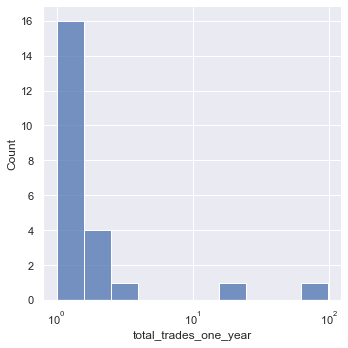

In [166]:
sns.set(rc={'figure.figsize':(20,6)})
sns.displot(x = "total_trades_one_year", data = df_anal3[df_anal3["total_trades_one_year"] > 0].dropna(), log_scale = True)

In [188]:
base

(0, 1]        19583
(1, 2]         6310
(2, 3]         2812
(6, 10237]     1667
(4, 6]         1541
(3, 4]         1473
Name: refer_bin, dtype: int64

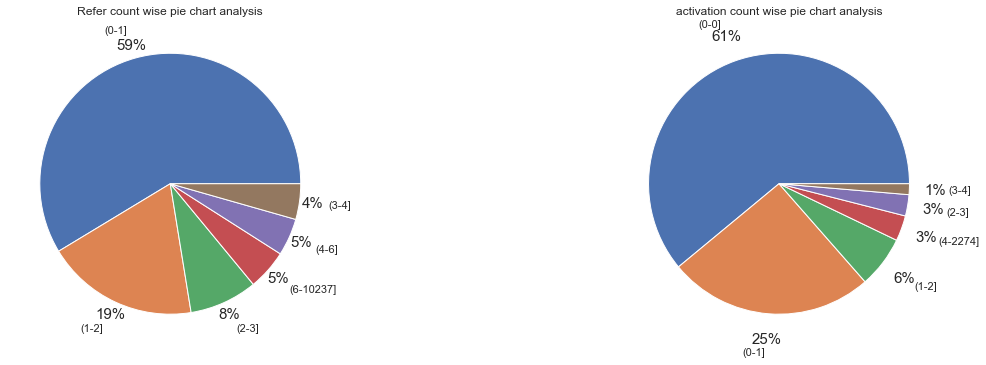

In [192]:

sns.set(rc={'figure.figsize':(20,6)})
base = df_anal["refer_bin"].value_counts()

cars = base.index
cars = ['({}-{}]'.format(round(car.left), round(car.right)) for car in cars]

data = base.values
  
# Creating plot
#  plt.figure(figsize =(10, 5))
plt.subplot(1, 2, 1)
plt.rcParams.update({'font.size': 15})
plt.pie(data, labels = cars, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.22)
plt.title("Refer count wise pie chart analysis")

base = df_anal["activation_bin"].value_counts()

cars = base.index
cars = ['({}-{}]'.format(round(car.left), round(car.right)) for car in cars]

data = base.values
  
# Creating plot
# plt.figure(figsize =(10, 5))
plt.subplot(1, 2, 2)
plt.pie(data, labels = cars, autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.3)
plt.title("activation count wise pie chart analysis")

# show plot
plt.show()


In [178]:
len(df_anal[df_anal["refer_count"] == 1])/len(df_anal)

0.5865632300964476

#### Analysis of activation percentage

([<matplotlib.patches.Wedge at 0x7fd9db155cd0>,
 [Text(-1.0368753014382779, 0.9406857122691298, '-0%-33%'),
  Text(0.7476554425054656, -1.1836432483193389, '67%-100%'),
  Text(1.3206547322756916, -0.4646192829810457, '33%-50%'),
  Text(1.3967791379904722, -0.0949106931520001, '50%-67%'),
  Text(1.399999975223775, -0.00026338836162890356, '100%-200%')],
 [Text(-0.8887502583756668, 0.8063020390878256, '77%'),
  Text(0.6408475221475419, -1.0145513557022905, '15%'),
  Text(1.1319897705220214, -0.39824509969803923, '6%'),
  Text(1.1972392611346905, -0.08135202270171436, '2%'),
  Text(1.1999999787632358, -0.00022576145282477447, '0%')])

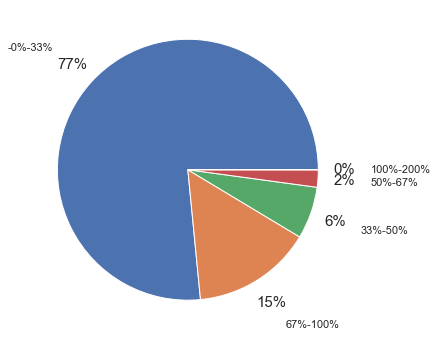

In [203]:
base = df_anal["activation_perc_bin"].value_counts()

cars = base.index

cars = ['{:.0f}%-{:.0f}%'.format(car.left*100, car.right*100) for car in cars]

data = base.values
  
# Creating plot
#  plt.figure(figsize =(10, 5))
plt.subplot(1, 2, 1)
plt.rcParams.update({'font.size': 15})
plt.pie(data, labels = cars, autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.4)
# plt.title("Analysis of activation percentage")

In [ ]:
df_model["age"] = df_model["age"].astype(float)

KeyError: 'target'

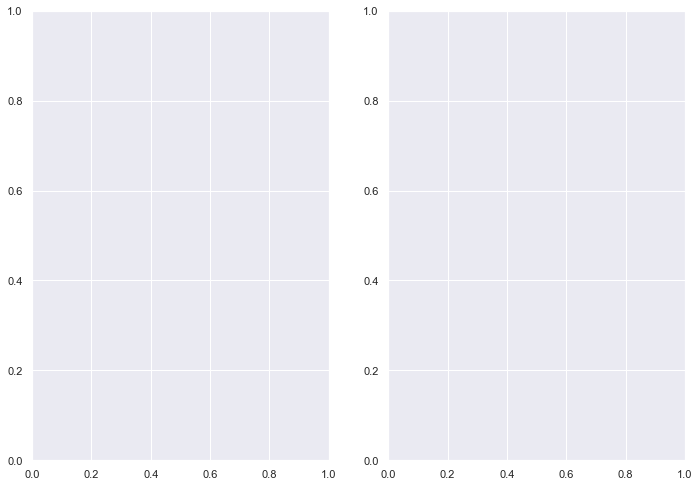

In [156]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(20,6)})
sns.histplot(df_model[df_model["target"] == 0], 
             x = "age" ,bins = 40,  ax=ax[0]).set_title("agewise for non-refers")


sns.histplot(df_model[df_model["target"] == 1], 
             x = "age", bins = 40,  ax=ax[1]).set_title("agewise for refers")

KeyError: 'target'

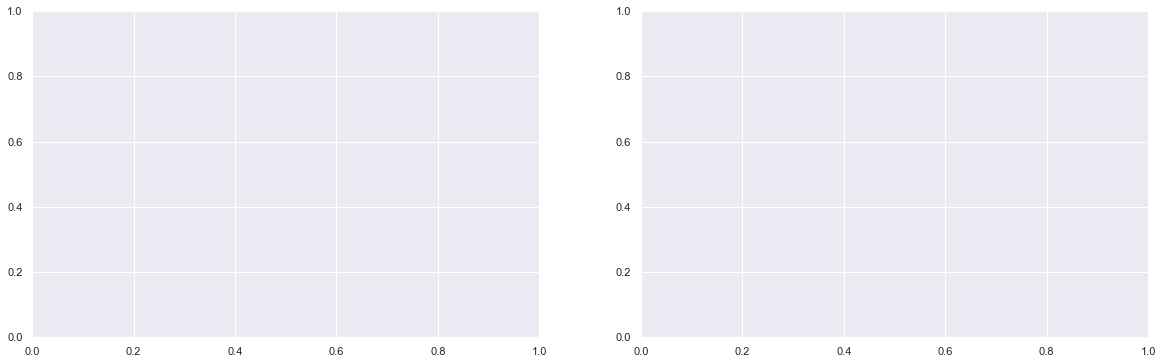

In [157]:
fig, ax =plt.subplots(1,2)

sns.histplot(df_model[df_model["target"] == 0], 
             x = "total_logins_one_year" ,bins = 40, 
            ax=ax[0]).set_title("distribution of referreres login in last year")
sns.histplot(df_model[(df_model["target"] == 1)], 
             x = "total_logins_one_year" ,bins = 40, 
            ax=ax[1]).set_title("distribution of referreres login in last year")

Text(0.5, 1.0, 'KRA customer  referrers')

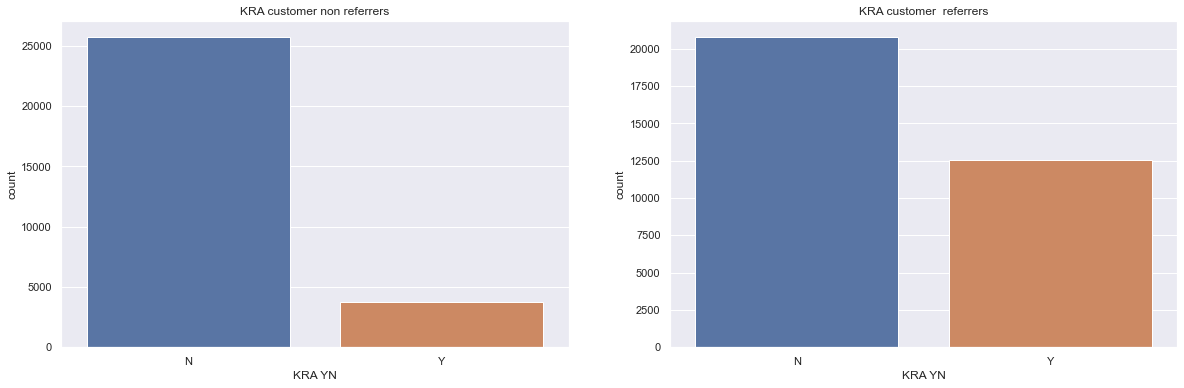

In [41]:
fig, ax =plt.subplots(1,2)

sns.countplot( x = "KRA YN", data = df_model[df_model["target"] == 0], ax = ax[0], 
             order = df_model["KRA YN"].value_counts().index).set_title("KRA customer non referrers")

sns.countplot(x = "KRA YN" , data = df_model[df_model["target"] == 1], 
              ax = ax[1], order = df_model["KRA YN"].value_counts().index).set_title("KRA customer  referrers")

Text(0.5, 1.0, 'Karvy customer  referrers')

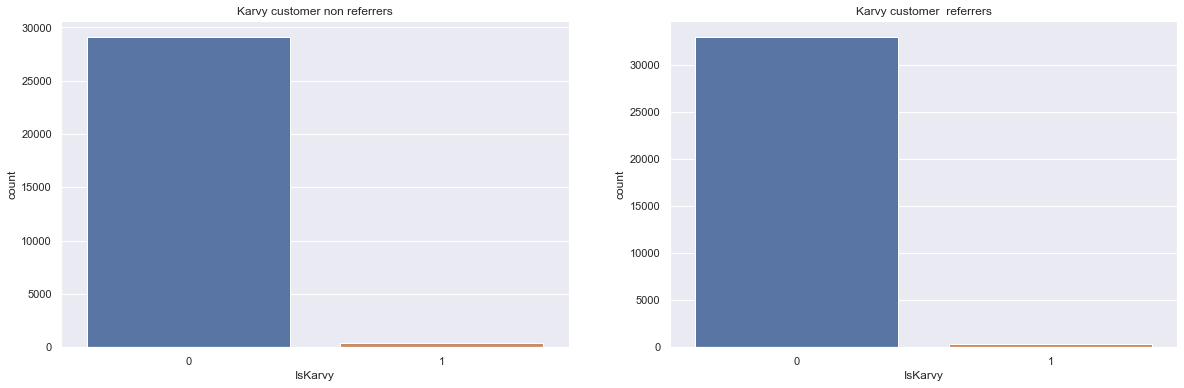

In [42]:
fig, ax =plt.subplots(1,2)

sns.countplot( x = "IsKarvy", data = df_model[df_model["target"] == 0], ax = ax[0], 
             order = df_model["IsKarvy"].value_counts().index).set_title("Karvy customer non referrers")

sns.countplot(x = "IsKarvy" , data = df_model[df_model["target"] == 1], 
              ax = ax[1], order = df_model["IsKarvy"].value_counts().index).set_title("Karvy customer  referrers")

In [43]:
df_model["target"] = df_model["activation_count"]/df_model["refer_count"]

In [44]:
bins = [0, 0.25, 0.5, 1]
df_model['target'] = pd.cut(df_model['target'], bins)

In [45]:
bins = [18, 24,30, 40, 50, 80]
df_model['age_binned'] = pd.cut(df_model['age'], bins)




<bound method Axes.set_title of <AxesSubplot:xlabel='age_binned', ylabel='count'>>

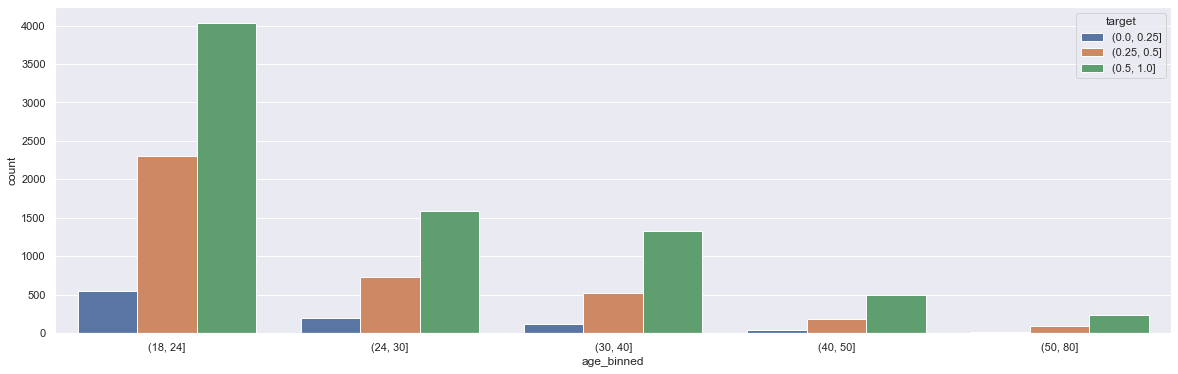

In [46]:
sns.countplot(x = "age_binned", data = df_model, hue = "target").set_title